In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
review_df = pd.read_csv("D:/pythonTest/DataShipJo/chicken_df.csv", names=['번호','가게명','총평점','주소','아이디','평점','날짜','리뷰'])
review_df.tail()

번호       가게명  총평점                            주소    아이디        평점  \
20101  20101  푸라닭-대학로점  4.8  서울 종로구 동숭동 1-89 석마빌딩 1층 102호  sk**님  3.333333   
20102  20102  푸라닭-대학로점  4.8  서울 종로구 동숭동 1-89 석마빌딩 1층 102호  mi**님  3.666667   
20103  20103  푸라닭-대학로점  4.8  서울 종로구 동숭동 1-89 석마빌딩 1층 102호     손님  4.666667   
20104  20104  푸라닭-대학로점  4.8  서울 종로구 동숭동 1-89 석마빌딩 1층 102호  we**님  5.000000   
20105  20105  푸라닭-대학로점  4.8  서울 종로구 동숭동 1-89 석마빌딩 1층 102호     손님  4.666667   

                  날짜                                                 리뷰  
20101  2020년 11월 22일        전체적으로 별루 였습니다  치킨은 다식어서왔구..눅눅하고..담엔 안시킬꺼같아요  
20102  2020년 11월 20일  피자는 너무 차가워서 넘 놀랐어요.한시간 넘게 걸려받았는데..치킨은 괜찮았어요..떡...  
20103  2020년 11월 20일  한마리 반이라 둘이 먹기 딱이에요. \n맛있고 넘 좋아요. 오자마자 바로 먹어 사진...  
20104  2020년 11월 20일              맛있게 잘 먹었습니다. 배달기사님이  아주 친절하시네요 .번창하세요  
20105  2020년 11월 20일  60분 걸린대서 조금 자려했는데 30분만에 와버려서 잠들려고 할 때 도착해버렸네요 ...

In [3]:
# 결측값 대체
review_df['리뷰'].fillna('N', inplace=True)
review_df['평점'].fillna(0,inplace=True)

In [4]:
# 결측값 열 삭제
review_df.dropna(inplace=True)

In [5]:
# 평점 소수값 반올림 해주기
review_df['평점'] = review_df['평점'].round(0).astype(int)
review_df.head()

번호       가게명  총평점                                       주소    아이디  평점  \
0   0  BHC-시립대점  4.8  서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층  oo**님   5   
1   1  BHC-시립대점  4.8  서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층  de**님   1   
2   2  BHC-시립대점  4.8  서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층  pr**님   5   
3   3  BHC-시립대점  4.8  서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층  sk**님   5   
4   4  BHC-시립대점  4.8  서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층  gh**님   5   

       날짜                  리뷰  
0   1시간 전                   N  
1   2시간 전             잘 먹었습니다  
2   4시간 전   양이 많이 줄어든 느낌 이네요.  
3   8시간 전  오늘도 맛나게 잘 먹었습니다~~~  
4  10시간 전         맛있어요 양도 많아요

In [6]:
# 정규 표현식 함수 정의

import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [7]:
review_df['리뷰'][6]

'오랜만에 뿌링클 먹었는데 정말 맛있었어요!! 정신못차리고 먹다가 급하게 사진 �m!! ㅜ.ㅜ 짱맛!!!'

In [8]:
apply_regular_expression(review_df['리뷰'][6]) # 특수문자 제거 확인

'오랜만에 뿌링클 먹었는데 정말 맛있었어요 정신못차리고 먹다가 급하게 사진  ㅜㅜ 짱맛'

In [9]:
from konlpy.tag import Okt
from konlpy.tag import Hannanum
from konlpy.tag import Kkma
from collections import Counter
from nltk.tokenize import sent_tokenize

In [10]:
apply_regular_expression(review_df['리뷰'][6])

'오랜만에 뿌링클 먹었는데 정말 맛있었어요 정신못차리고 먹다가 급하게 사진  ㅜㅜ 짱맛'

In [11]:
okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(apply_regular_expression(review_df['리뷰'][6]))
nouns

['만', '뿌', '링클', '정말', '정신', '사진', '맛']

In [12]:
# 말뭉치 생성
corpus = "".join(review_df['리뷰'].tolist())
corpus

'N잘 먹었습니다양이 많이 줄어든 느낌 이네요.오늘도 맛나게 잘 먹었습니다~~~맛있어요 양도 많아요맛있게 잘먹었어요 다음에 또주문할께요오랜만에 뿌링클 먹었는데 정말 맛있었어요!! 정신못차리고 먹다가 급하게 사진 �m!! ㅜ.ㅜ 짱맛!!!너무 맛있어요 여기 지점 좋네요맛있게 잘먹었어요 바삭바삭하네요혹시 hite 맥주 잘못 주신 것 아니에요? 생맥주라면 이런 맛이 안나오는데 ㅠㅠㅠ 너무 하시네요. 솔직히 별 하나 주기도 너무 싫어요...따뜻하고 맛있었어요맛있어요 또 먹고싶넹여긴 맛초킹이 정말 맛있어요ㅠ 닭도 부드럽고 소스도 맛있고 잘먹었습니다!맛있게잘먹었습니다~~~사진 찍고싶었는데 까먹고 다 먹어버�f네용 담에 또 시킬게요!!!!냄새에 홀려 정신나간듯 먹다가 사진찍었네요ㅜㅜ 이케큰콜라가 서비스라니 번창하세요~~배달도 빠르고 맛있게 잘 먹었습니다아주 좋송 맛있어유1인 1닭했네요 역시 시립대점 bb맛있게 잘 먹었습니다~꿀맛 근데 치즈볼 하나에요 ㅠㅠ?여긴 맛이 검증된곳이라.할말 없음맛도 양도 배달도 항상 실망하는 일이 없습니다!시간도정확하고 맛나게 드세요맛있게 잘 먹었습니다~~!!맛있게 먹었어요맛있어서 순삭했어요.ㅋㅋㅋ잘먹었어요~!애들이 이것만 찾아요~~^^맛있게 잘 먹었습니다하바네로 포테킹이 왜 인기있는지 알겠어요~♡ 겉은 바싹 속은 촉촉합니다. 닭가슴살이 진짜 맛나요♡ 케찹 찍어도 맛나요ㅋㅋㅋㅋ 골드킹도 달콤 짭짤하니 맛나요~ 치즈볼은 BHC~!!♡ 잘먹었습니다~!!역시 뿌링클 ㅠ 맛있어요역시 시립대점이야~~~~~~포테킹 너무 맛있어용항상 잘 먹고 있습니다콜팝도 너무 맛있고 치킨도 아주 맛있어요골드킹 처음 먹어봤는데 맛있고 좋네요~~잘먹었어요 살짝 매콤한듯한 느킴도 있는데 그건 닭이 염지가 매콤한듯 해요빠삭하니 맛있게 잘먹었습니다~~맛있었어요시립대점이 젤 맛있어요~!! 맛있게 넘 잘먹었습니다정말 맛있어요!!!튀김옷 바삭바삭 맛있어요배달 빠르구 맛있어용~!맛있게 잘 먹었습니다맛있게 잘 먹었습니다날씬한 다리가 아숩지만 맛있어요대박 맛 대박 잘생긴 배달 오빠.. 감사했

In [13]:
# 정규 표현식 적용
apply_regular_expression(corpus)

'잘 먹었습니다양이 많이 줄어든 느낌 이네요오늘도 맛나게 잘 먹었습니다맛있어요 양도 많아요맛있게 잘먹었어요 다음에 또주문할께요오랜만에 뿌링클 먹었는데 정말 맛있었어요 정신못차리고 먹다가 급하게 사진  ㅜㅜ 짱맛너무 맛있어요 여기 지점 좋네요맛있게 잘먹었어요 바삭바삭하네요혹시  맥주 잘못 주신 것 아니에요 생맥주라면 이런 맛이 안나오는데 ㅠㅠㅠ 너무 하시네요 솔직히 별 하나 주기도 너무 싫어요따뜻하고 맛있었어요맛있어요 또 먹고싶넹여긴 맛초킹이 정말 맛있어요ㅠ 닭도 부드럽고 소스도 맛있고 잘먹었습니다맛있게잘먹었습니다사진 찍고싶었는데 까먹고 다 먹어버네용 담에 또 시킬게요냄새에 홀려 정신나간듯 먹다가 사진찍었네요ㅜㅜ 이케큰콜라가 서비스라니 번창하세요배달도 빠르고 맛있게 잘 먹었습니다아주 좋송 맛있어유인 닭했네요 역시 시립대점 맛있게 잘 먹었습니다꿀맛 근데 치즈볼 하나에요 ㅠㅠ여긴 맛이 검증된곳이라할말 없음맛도 양도 배달도 항상 실망하는 일이 없습니다시간도정확하고 맛나게 드세요맛있게 잘 먹었습니다맛있게 먹었어요맛있어서 순삭했어요ㅋㅋㅋ잘먹었어요애들이 이것만 찾아요맛있게 잘 먹었습니다하바네로 포테킹이 왜 인기있는지 알겠어요 겉은 바싹 속은 촉촉합니다 닭가슴살이 진짜 맛나요 케찹 찍어도 맛나요ㅋㅋㅋㅋ 골드킹도 달콤 짭짤하니 맛나요 치즈볼은  잘먹었습니다역시 뿌링클 ㅠ 맛있어요역시 시립대점이야포테킹 너무 맛있어용항상 잘 먹고 있습니다콜팝도 너무 맛있고 치킨도 아주 맛있어요골드킹 처음 먹어봤는데 맛있고 좋네요잘먹었어요 살짝 매콤한듯한 느킴도 있는데 그건 닭이 염지가 매콤한듯 해요빠삭하니 맛있게 잘먹었습니다맛있었어요시립대점이 젤 맛있어요 맛있게 넘 잘먹었습니다정말 맛있어요튀김옷 바삭바삭 맛있어요배달 빠르구 맛있어용맛있게 잘 먹었습니다맛있게 잘 먹었습니다날씬한 다리가 아숩지만 맛있어요대박 맛 대박 잘생긴 배달 오빠 감사했어요빠르고 맛있어요또 시킬게요잘먹었어요 항상 맛있어요빨리와주셨어요 포장도 사진처럼 깔끔하게  그리고 리뷰이벤트는 뿌링소스만인데 콜라에 다른소스하나더에 쿠폰까지 차

In [14]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

# 전체 말뭉치에서 명사 형태소 추출 :: hannanum
# han = han.nouns()
# print(han)

# # 전체 말뭉치에서 명사 형태소 추출 :: kkma
# kkma_total = kkma.nouns()
# print(kkma_total)

# # 전체 말뭉치에서 명사 형태소 추출 :: hannanum
# han_total = hannanum.nouns(apply_regular_expression())
# print(han_total)

['양', '느낌', '오늘', '맛', '양도', '다음', '또', '주문', '만', '뿌', '링클', '정말', '정신', '사진', '맛', '여기', '지점', '혹시', '맥주', '잘못', '주신', '것', '생맥주', '라면', '맛', '별', '하나', '주기도', '또', '넹', '맛초킹', '정말', '닭', '소스', '사진', '버', '용', '담', '또', '냄새', '홀려', '정신', '사진', '케', '콜라', '서비스', '번창', '배달', '아주', '좋송', '유인', '닭', '역시', '시립대', '점', '꿀맛', '치즈볼', '하나', '맛', '검증', '곳', '맛', '양도', '배달', '항상', '시간', '맛', '순삭', '애', '것', '하바네로', '포테킹', '왜', '인기', '겉', '바싹', '속', '닭', '가슴', '살이', '진짜', '맛', '요', '케찹', '맛', '요', '골드', '킹', '달콤', '맛', '요', '치즈볼', '역시', '뿌', '링클', '역시', '시립대', '점', '포테킹', '항상', '콜팝', '치킨', '아주', '골드', '킹', '처음', '살짝', '매콤', '듯', '느킴', '닭', '염', '매콤', '듯', '해', '빠삭', '시립대', '점', '젤', '정말', '튀김', '옷', '배달', '다리', '아숩', '대박', '맛', '대박', '배달', '오빠', '또', '항상', '포장', '사진', '리뷰', '이벤트', '뿌링', '소스', '콜라', '소스', '쿠폰', '차', '감동', '무지', '좀', '뿌링소스', '맛', '중화', '소스', '제입', '불닭볶음면', '분', '무엇', '닭', '닭', '색도', '새', '야들야들', '뿌링', '핫도그', '요', '전', '치즈볼', '이', '더', '추천', '원래', '쿠폰', '장', '전', '안', '쿠폰', '꼭', '장

In [15]:
# 빈도 탐색
counter = Counter(nouns)

In [64]:
# 빈도수가 높은순으로 나열
counter.most_common()

[('배달', 4166),
 ('맛', 3941),
 ('치킨', 2649),
 ('링클', 1160),
 ('항상', 1097),
 ('뿌', 1049),
 ('주문', 1041),
 ('양도', 1028),
 ('진짜', 970),
 ('역시', 946),
 ('또', 937),
 ('정말', 905),
 ('최고', 802),
 ('바삭', 780),
 ('후라이드', 761),
 ('점', 741),
 ('양념', 735),
 ('좀', 699),
 ('시간', 696),
 ('처음', 694),
 ('더', 678),
 ('서비스', 651),
 ('치즈볼', 649),
 ('리뷰', 623),
 ('다음', 614),
 ('양', 588),
 ('소스', 578),
 ('오늘', 561),
 ('튀김', 553),
 ('시립대', 541),
 ('닭', 538),
 ('여기', 526),
 ('떡', 503),
 ('사진', 468),
 ('것', 466),
 ('살', 433),
 ('요', 425),
 ('가루', 423),
 ('만', 414),
 ('때', 409),
 ('이벤트', 400),
 ('자주', 399),
 ('습', 396),
 ('맛초킹', 393),
 ('분', 388),
 ('조금', 381),
 ('생각', 357),
 ('킹', 355),
 ('메뉴', 335),
 ('아주', 313),
 ('늘', 303),
 ('완전', 301),
 ('골드', 288),
 ('간장', 277),
 ('사장', 271),
 ('추천', 264),
 ('뿌링클', 256),
 ('감자', 254),
 ('콜라', 252),
 ('집', 251),
 ('제', 250),
 ('예상', 247),
 ('다른', 241),
 ('배송', 237),
 ('곳', 236),
 ('존맛', 236),
 ('그냥', 235),
 ('옷', 233),
 ('거', 231),
 ('안', 227),
 ('매콤', 220),
 ('굿', 220),
 

In [17]:
# 글자수가 하나 이상인 값 저장 :: 글자수가 하나인 값 삭제
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})

# 글자수가 둘 이상인 값 빈도순으로 나열
available_counter.most_common(10)

[('배달', 4166),
 ('치킨', 2649),
 ('링클', 1160),
 ('항상', 1097),
 ('주문', 1041),
 ('양도', 1028),
 ('진짜', 970),
 ('역시', 946),
 ('정말', 905),
 ('최고', 802)]

In [18]:
# 중요한 한 글자수 (양, 맛) 
# 변수에 다시 저장
taste = counter.most_common(50)[1]
oneWord = dict([taste])

quantity = counter.most_common(50)[25]
oneWord2 = dict([quantity])

In [19]:
# available_counter에 추가
available_counter.update(oneWord)
available_counter.update(oneWord2)

In [20]:
# RANKS NL에 제공해주는 한국어 불용어 사전
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [104]:
# 사용자가 지정하는 불용어를 stopwords 안에 추가로 저장
chicken_review_stopwords = ['시립대', '여기', '통해', '당근', '보랑', '신지', '시립대', '생각', '예상', '다른', '아이', '디디', '정도', 
                            '이번', '매번', '요청', '살이', '가지', '주신', '마리', '주시', '달라', '언제', '분도', '때문', '요양', 
                            '바로', '모두', '다만', '이제', '엇습', '부분', '보고', '거의', '이용', '분만', '요기', '자체', '자마자', 
                            '애용', '무엇', '안나', '어요', '이건', '대봉', '우리', '기요', '그거', '엇어', '나용', '직접', '런가', '오지', 
                            '건가', '그것', '혹시', '싸이', '읍니', '요가', '식지', '무가', '이서', '요순', '다가', '대요', '는걸', '스노', 
                            '고뿌', '커서', '보이', '치하', '소이', '나무', '아아', '오구', '안국', '아빠', '라칸', '번은', '라이', '하니', 
                            '에어', '이나', '습니', '낭낭', '일드', '텐더', '이구', '이예', '아마', '만하', '온건', '먹엇습니', '아들', '종로']
for word in chicken_review_stopwords:
    stopwords.append(word)

In [66]:
# BoW 벡터 생성
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(review_df['리뷰'].tolist()) # 단어의 빈도 수를 희소행렬로 받아온다
word_list = vect.get_feature_names() # 단어 리스트
count_list = bow_vect.toarray().sum(axis=0) # 각 단어가 전체 리뷰중에 등장한 총 횟수

In [67]:
# 단어 리스트
word_list

['가게',
 '가격',
 '가기',
 '가까스로',
 '가까이',
 '가끔',
 '가나',
 '가나다',
 '가능',
 '가도',
 '가득',
 '가뜩이나',
 '가라',
 '가락',
 '가량',
 '가루',
 '가루라',
 '가마니',
 '가맹',
 '가면',
 '가몬',
 '가문',
 '가미',
 '가방',
 '가사',
 '가성',
 '가슴',
 '가시',
 '가식',
 '가신',
 '가안',
 '가야',
 '가온',
 '가요',
 '가용',
 '가운데',
 '가장',
 '가족',
 '가주',
 '가즈',
 '각각',
 '각양각색',
 '각종',
 '간간',
 '간강',
 '간김',
 '간나',
 '간다',
 '간단',
 '간도',
 '간만',
 '간맛',
 '간반',
 '간식',
 '간이',
 '간임',
 '간자',
 '간장',
 '간장게장',
 '간정',
 '간좀',
 '간지',
 '간토',
 '간판',
 '간혹',
 '갈고',
 '갈등',
 '갈라',
 '갈리',
 '갈릭',
 '갈릴',
 '갈비',
 '갈색',
 '갈수록',
 '갈팡질팡',
 '감격',
 '감기',
 '감당',
 '감동',
 '감듬',
 '감맙',
 '감복',
 '감사',
 '감사햐',
 '감삼돠',
 '감샤',
 '감샤르',
 '감성',
 '감솨',
 '감안',
 '감자',
 '감자튀기',
 '감정',
 '감칠맛',
 '감탄',
 '감탄사',
 '감튀듀',
 '감흥',
 '감히',
 '갑갑갑',
 '갑자기',
 '값어치',
 '강도',
 '강력',
 '강아지',
 '강정',
 '강정은',
 '강추',
 '강추초강추',
 '강추추추추',
 '강하나',
 '강황',
 '갖은',
 '같슴다',
 '같아욤',
 '개개',
 '개꿀',
 '개꿀띠',
 '개꿀맛',
 '개꿀임',
 '개념',
 '개도',
 '개드립',
 '개맛',
 '개모',
 '개발',
 '개봉',
 '개비',
 '개선',
 '개성',
 '개수',
 '개시',
 '개업',
 '개열',
 '개요',
 '개욥',
 '개운',

In [68]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [69]:
bow_vect.shape

(20106, 4752)

In [70]:
# "단어" - "총 등장 횟수" Matching

word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가게': 39,
 '가격': 135,
 '가기': 1,
 '가까스로': 1,
 '가까이': 4,
 '가끔': 34,
 '가나': 5,
 '가나다': 2,
 '가능': 1,
 '가도': 1,
 '가득': 25,
 '가뜩이나': 1,
 '가라': 3,
 '가락': 1,
 '가량': 6,
 '가루': 421,
 '가루라': 1,
 '가마니': 1,
 '가맹': 2,
 '가면': 6,
 '가몬': 1,
 '가문': 1,
 '가미': 2,
 '가방': 4,
 '가사': 1,
 '가성': 88,
 '가슴': 64,
 '가시': 4,
 '가식': 1,
 '가신': 1,
 '가안': 1,
 '가야': 2,
 '가온': 1,
 '가요': 32,
 '가용': 1,
 '가운데': 1,
 '가장': 55,
 '가족': 55,
 '가주': 1,
 '가즈': 1,
 '각각': 3,
 '각양각색': 1,
 '각종': 1,
 '간간': 4,
 '간강': 1,
 '간김': 1,
 '간나': 1,
 '간다': 3,
 '간단': 1,
 '간도': 20,
 '간만': 37,
 '간맛': 1,
 '간반': 2,
 '간식': 8,
 '간이': 40,
 '간임': 1,
 '간자': 1,
 '간장': 279,
 '간장게장': 1,
 '간정': 1,
 '간좀': 1,
 '간지': 1,
 '간토': 1,
 '간판': 1,
 '간혹': 2,
 '갈고': 1,
 '갈등': 1,
 '갈라': 1,
 '갈리': 2,
 '갈릭': 27,
 '갈릴': 2,
 '갈비': 9,
 '갈색': 2,
 '갈수록': 4,
 '갈팡질팡': 1,
 '감격': 1,
 '감기': 5,
 '감당': 1,
 '감동': 79,
 '감듬': 1,
 '감맙': 1,
 '감복': 1,
 '감사': 73,
 '감사햐': 1,
 '감삼돠': 1,
 '감샤': 1,
 '감샤르': 1,
 '감성': 2,
 '감솨': 1,
 '감안': 7,
 '감자': 253,
 '감자튀기': 1,
 '감정': 1,
 '감칠맛': 7,
 '감탄': 9,
 '감탄사'

## TF-IDF 변환

### Bag of Words 벡터에 대해서 TF-IDF변환 진행합니다.TF-IDF 변환
* Bow :: 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만든다
* TF-IDF는 TF와 IDF를 곱한 값으로 점수가 높은 단어일수록 다른 문서에는 많지 않고 해당 문서에서 자주 등장하는 단어 를 의미한다

In [71]:
# TF-IDF 적용
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [72]:
print(tf_idf_vect.shape)

(20106, 4752)


In [73]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

In [74]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 4752)
[[0. 0. 0. ... 0. 0. 0.]]


In [75]:
# 벡터 - 단어 MAPPING
vect.vocabulary_

{'느낌': 745,
 '오늘': 2883,
 '양도': 2679,
 '주문': 3693,
 '링클': 1208,
 '정신': 3563,
 '사진': 2112,
 '지점': 3782,
 '맥주': 1413,
 '잘못': 3417,
 '생맥주': 2192,
 '라면': 1117,
 '하나': 4479,
 '주기도': 3680,
 '맛초킹': 1367,
 '소스': 2278,
 '냄새': 655,
 '홀려': 4661,
 '콜라': 4194,
 '서비스': 2211,
 '번창': 1767,
 '배달': 1721,
 '아주': 2589,
 '좋송': 3662,
 '어유': 2733,
 '꿀맛': 579,
 '치즈볼': 4105,
 '검증': 199,
 '시간': 2416,
 '순삭': 2336,
 '하바네로': 4488,
 '포테킹': 4414,
 '인기': 3280,
 '바싹': 1654,
 '가슴': 26,
 '케찹': 4179,
 '골드': 300,
 '달콤': 839,
 '콜팝': 4196,
 '치킨': 4113,
 '살짝': 2134,
 '매콤': 1404,
 '느킴': 752,
 '빠삭하': 1988,
 '튀김': 4313,
 '다리': 779,
 '아숩': 2572,
 '대박': 885,
 '오빠': 2901,
 '포장': 4409,
 '리뷰': 1193,
 '이벤트': 3213,
 '뿌링': 2037,
 '쿠폰': 4205,
 '감동': 78,
 '무지': 1570,
 '뿌링소스': 2053,
 '중화': 3736,
 '제입': 3592,
 '불닭볶음면': 1914,
 '색도': 2184,
 '야들야들': 2663,
 '핫도그': 4549,
 '추천': 4064,
 '원래': 3080,
 '강추': 107,
 '자주': 3387,
 '후라이드': 4710,
 '하진': 4496,
 '먹기': 1444,
 '이틀': 3267,
 '감자': 90,
 '그냥': 429,
 '그날': 428,
 '메뉴': 1473,
 '가격': 1,
 '바삭': 1650,


In [76]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{745: '느낌', 2883: '오늘', 2679: '양도', 3693: '주문', 1208: '링클', 3563: '정신', 2112: '사진', 3782: '지점', 1413...


## 감성 분류 – Logistic Regression
#### 이제 전처리된 리뷰 데이터를 활용하여 감성 분류 예측 모델을 만들겠습니다.

* 감성 분류 예측 모델이란, 이용자 리뷰의 평가 내용을 통해 이 리뷰가 긍정적인지, 부정적인지를 예측하여, 이용자의 감성을 파악하는 겁니다. 따라서, 모델의 X 값(즉, feature 값)은 이용자 리뷰의 평가 내용이 되겠고, 모델의 Y 값(즉, label 값)은 이용자의 긍/부정 감성이 되겠습니다.

## 데이터셋 생성
#### Label

우리는 이용자의 리뷰를 “긍정” / “부정” 두가지 부류로 나누고자 합니다. 하지만 이러한 이용자의 감성을 대표할 수 있는 “평가 점수” 변수는 1 ~ 5의 value를 가지고 있습니다. 따라서 "평가 점수"변수 (rating: 1 ~ 5)를 이진 변수 (긍정: 1, 부정:0)으로 변환해야 합니다.

In [77]:
review_df.sample(10)

번호              가게명  총평점                                       주소  \
2499    2499         BHC-시립대점  4.8  서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층   
6454    6454         BHC-시립대점  4.8  서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층   
2545    2545         BHC-시립대점  4.8  서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층   
18566  18566         쌀통닭-북창동점  4.8                   서울특별시 중구 북창동 17-5 17-5   
17271  17271  순살이맛있는디디치킨-독립문점  4.7            서울특별시 서대문구 옥천동 124-2 124-2 지층   
613      613         BHC-시립대점  4.8  서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층   
16246  16246  순살이맛있는디디치킨-독립문점  4.7            서울특별시 서대문구 옥천동 124-2 124-2 지층   
13500  13500         교촌치킨-안국점  4.7              서울특별시 종로구 화동 138-7 138-7 1층   
3324    3324         BHC-시립대점  4.8  서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층   
19189  19189         자담치킨-종로점  4.9                    서울특별시 종로구 관철동 13-9 1층   

         아이디  평점             날짜  \
2499   es**님   5  2021년 08월 24일   
6454      손님   5  2020년 03월 08일   
2545   kk**님   5  2021년 08월 14일   
18566  ki**님   5  2022년 02월 08일   
17271  jj**님   5  2019년 05월 03일   
613    cu**님   5  2022년 02월 22일   
16246  me**님   5  2020년 08월 04일   
13500     손님   4  2020년 10월 19일   
3324   ek**님   5  2021년 05월 25일   
19189  tm**님   4  2022년 03월 29일   

                                                      리뷰  y  
2499                             동네에서 제일 맛있는 치킨 ! 맛있어요 !  1  
6454                     배달이 엄청빠르고 맛도 있었어요! 다음에 또 시켜먹을게요  1  
2545   다른데서 시켜 먹다가 오늘 여기서 처음 시켜봤는데 배달 빨라서 엄청 따끈따끈하게 오...  1  
18566                               맛나게 잘먹었어요. 대박 나세요 !.  1  
17271                                  굳 굳~ㄹ♥♥♥♥♥♥♥♥♥♥♥♥  1  
613                                           맛있게 잘먹었습니다  1  
16246                                       맛있게 잘 먹었습니다~  1  
13500  깔끔하고 맛있는 치킨이었습니다! 너무 맛있어서 금방먹어서 아쉽네요 ㅜㅜ 배달도 따끈...  1  
3324             뿌링클은 쿨타임차면 주기적으로 먹어야조 ㅎㅎ 맛있는 치킨 감사합니다:)  1  
19189  맛슐랭 처음 먹는데 맛잇게 잘먹었습니당!! 마일드 맛이라  윗부분 먹엇을땐 달달한데...  1

<AxesSubplot:>

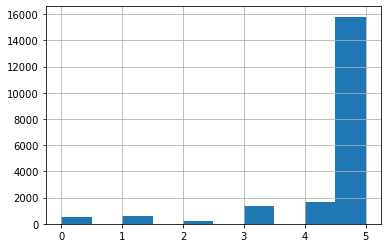

In [78]:
# 4,5 점 - 긍정 - 1부여, 1~3 점 - 부정 - 0 부여
review_df['평점'].hist()

In [79]:
def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0
    
review_df['y'] = review_df['평점'].apply(lambda x: rating_to_label(x))

In [80]:
review_df.head()

번호       가게명  총평점                                       주소    아이디  평점  \
0   0  BHC-시립대점  4.8  서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층  oo**님   5   
1   1  BHC-시립대점  4.8  서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층  de**님   1   
2   2  BHC-시립대점  4.8  서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층  pr**님   5   
3   3  BHC-시립대점  4.8  서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층  sk**님   5   
4   4  BHC-시립대점  4.8  서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층  gh**님   5   

       날짜                  리뷰  y  
0   1시간 전                   N  1  
1   2시간 전             잘 먹었습니다  0  
2   4시간 전   양이 많이 줄어든 느낌 이네요.  1  
3   8시간 전  오늘도 맛나게 잘 먹었습니다~~~  1  
4  10시간 전         맛있어요 양도 많아요  1

In [81]:
review_df["y"].value_counts()

1    17476
0     2630
Name: y, dtype: int64

In [82]:
# 모델의 feature 변수를 중요도를 나타내는 tf_idf_vect로 대체
# train - test 나누기
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = review_df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [83]:
x_train.shape, y_train.shape

((14074, 4752), (14074,))

In [84]:
x_test.shape, y_test.shape

((6032, 4752), (6032,))

In [85]:
# Logistic Regression 모델 학습
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [86]:
# 분류 결과 평가
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.87
precision: 0.87
recall: 1.00
F1: 0.93


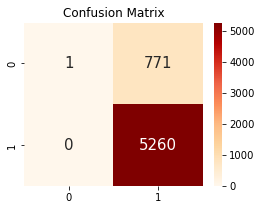

In [87]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [88]:
# 샘플링 재조정 -> 클래스 불균형 조정 -> 1:1 sampling

In [89]:
review_df['y'].value_counts()

1    17476
0     2630
Name: y, dtype: int64

In [90]:
positive_random_idx = review_df[review_df['y']==1].sample(2142, random_state=12).index.tolist()
negative_random_idx = review_df[review_df['y']==0].sample(2142, random_state=12).index.tolist()

In [91]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf_vect[random_idx]
y = review_df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [92]:
x_train.shape, y_train.shape

((3213, 4752), (3213,))

In [93]:
x_test.shape, y_test.shape

((1071, 4752), (1071,))

In [94]:
# 모델 재학습
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [95]:
# 분류 결과 평가
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.55
precision: 0.54
recall: 0.72
F1: 0.61


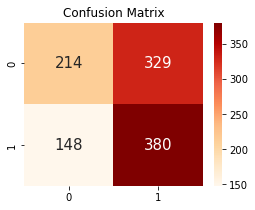

In [96]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [97]:
# 긍정 / 부정 키워드 분석
lr2.coef_

array([[-0.62686605, -0.37702217,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

<BarContainer object of 4752 artists>

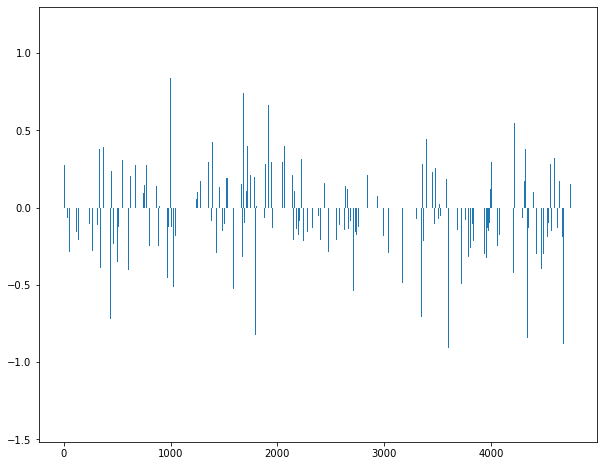

In [98]:
# print logistic regression's coef
plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])

In [99]:
# 긍정 / 부정 키워드 top 5 출력
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환함

[(1.1701045942446984, 3877), (1.003136098252332, 1193), (1.0018248240272396, 4294), (0.9673586882103683, 2878), (0.9296780255036627, 844)]
[(-0.9624497069217823, 4052), (-1.0043461190581024, 4213), (-1.0880553011870548, 2556), (-1.2270737506461775, 1043), (-1.387665476235921, 4542)]


In [100]:
#전체 단어가 포함한 긍정 키워드 리스트와 부정 키워드 리스트를 정의하고 출력
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index

[(1.1701045942446984, 3877),
 (1.003136098252332, 1193),
 (1.0018248240272396, 4294),
 (0.9673586882103683, 2878),
 (0.9296780255036627, 844),
 (0.8794856892429422, 3000),
 (0.8720880734175531, 2112),
 (0.8605261278612797, 4606),
 (0.8409950852336731, 1455),
 (0.8399943069434477, 998),
 (0.8081251161322033, 1396),
 (0.8025409820462734, 478),
 (0.798112215914515, 1267),
 (0.7976488175745493, 1340),
 (0.7944096239121542, 1139),
 (0.7851533097214359, 1394),
 (0.7703653766061992, 4600),
 (0.7690756439040589, 3307),
 (0.7629648146900978, 161),
 (0.762311044770095, 915),
 (0.7424405427577766, 2053),
 (0.7387116582603062, 1682),
 (0.7277116716094307, 1147),
 (0.7234741120670982, 2688),
 (0.7133046595230036, 608),
 (0.7116720762623575, 2679),
 (0.7020565729298172, 1830),
 (0.6987527253905294, 71),
 (0.6951095358496219, 1797),
 (0.6709928122913443, 1910),
 (0.6663232372398872, 990),
 (0.6661941392121474, 1916),
 (0.661631787335185, 2104),
 (0.6492253712050349, 889),
 (0.6289751835000692, 1404),

In [101]:
# index를 단어로 변환하여 긍정 키워드 리스트와 부정 키워드 리스트 top 20 출력
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{745: '느낌',
 2883: '오늘',
 2679: '양도',
 3693: '주문',
 1208: '링클',
 3563: '정신',
 2112: '사진',
 3782: '지점',
 1413: '맥주',
 3417: '잘못',
 2192: '생맥주',
 1117: '라면',
 4479: '하나',
 3680: '주기도',
 1367: '맛초킹',
 2278: '소스',
 655: '냄새',
 4661: '홀려',
 4194: '콜라',
 2211: '서비스',
 1767: '번창',
 1721: '배달',
 2589: '아주',
 3662: '좋송',
 2733: '어유',
 579: '꿀맛',
 4105: '치즈볼',
 199: '검증',
 2416: '시간',
 2336: '순삭',
 4488: '하바네로',
 4414: '포테킹',
 3280: '인기',
 1654: '바싹',
 26: '가슴',
 4179: '케찹',
 300: '골드',
 839: '달콤',
 4196: '콜팝',
 4113: '치킨',
 2134: '살짝',
 1404: '매콤',
 752: '느킴',
 1988: '빠삭하',
 4313: '튀김',
 779: '다리',
 2572: '아숩',
 885: '대박',
 2901: '오빠',
 4409: '포장',
 1193: '리뷰',
 3213: '이벤트',
 2037: '뿌링',
 4205: '쿠폰',
 78: '감동',
 1570: '무지',
 2053: '뿌링소스',
 3736: '중화',
 3592: '제입',
 1914: '불닭볶음면',
 2184: '색도',
 2663: '야들야들',
 4549: '핫도그',
 4064: '추천',
 3080: '원래',
 107: '강추',
 3387: '자주',
 4710: '후라이드',
 4496: '하진',
 1444: '먹기',
 3267: '이틀',
 90: '감자',
 429: '그냥',
 428: '그날',
 1473: '메뉴',
 1: '가격',
 1650: '바삭',


In [119]:
for coef in coef_pos_index[:100]:
    print(invert_index_vectorizer[coef[1]], coef[0])

짱짱 1.1701045942446984
리뷰 1.003136098252332
통닭 1.0018248240272396
옛날 0.9673586882103683
닭도리탕 0.9296780255036627
요구사항 0.8794856892429422
사진 0.8720880734175531
허니 0.8605261278612797
먹엇습니 0.8409950852336731
동네 0.8399943069434477
매일 0.8081251161322033
기간 0.8025409820462734
만두 0.798112215914515
맛잇엇어 0.7976488175745493
레드 0.7944096239121542
매우 0.7851533097214359
행사 0.7703653766061992
일단 0.7690756439040589
거리 0.7629648146900978
대한 0.762311044770095
뿌링소스 0.7424405427577766
반찬 0.7387116582603062
레오 0.7277116716094307
양은 0.7234741120670982
나중 0.7133046595230036
양도 0.7116720762623575
보장 0.7020565729298172
갈비 0.6987527253905294
별미 0.6951095358496219
불구 0.6709928122913443
독립문 0.6663232372398872
불리 0.6661941392121474
사이드 0.661631787335185
대비 0.6492253712050349
매콤 0.6289751835000692
배신 0.6260160178239088
콤보 0.6163059086507036
사고 0.5999683660876111
후추 0.5932051234431226
여윽시 0.5911431008968464
사이 0.5901947295998516
나름 0.5802366169608834
어유 0.5775295752293975
새벽 0.5763345151243602
먹음 0.5684923921245195
크

In [120]:
for coef in coef_neg_index[:100]:
    print(invert_index_vectorizer[coef[1]], coef[0])

할인 -1.387665476235921
듬뿍 -1.2270737506461775
아들 -1.0880553011870548
크기 -1.0043461190581024
최악 -0.9624497069217823
과자 -0.9596234927749803
콜라 -0.9582715021135206
레카 -0.9472556765421936
촉촉 -0.9296998573286788
고추 -0.9156593486310579
조각 -0.907240514907319
바싹 -0.8977692723642734
화장실 -0.8814721243847689
싱글 -0.881162338457086
스틱 -0.878160040239897
이집 -0.8656753952766476
포장 -0.8632343162416563
연락 -0.8610953636556796
맵스터 -0.8524221970472994
파닭 -0.8463971966754685
기본 -0.8376458944779728
별로 -0.8270287829048386
소스 -0.8161400421359016
도착 -0.8116100497190983
핫후 -0.7798057969991214
지점 -0.7764805038407913
가족 -0.7744975127511947
종로 -0.7355741824386927
그대로 -0.7219920839519529
조리 -0.721967560195192
장님 -0.7187842717588071
후회 -0.7106494128468895
입맛 -0.710488310108749
전화 -0.7017523880478544
잘먹엇네 -0.6864351115588919
점점 -0.6815795678787339
최하 -0.6815795678787339
화이팅 -0.6815795678787339
상품 -0.6624481187457658
실망 -0.6602473792086471
튀김 -0.6563691815073576
전체 -0.6498662512468416
문제 -0.6444079804479891
신속 -0.64389

In [123]:
chicken_label = review_df[['아이디','리뷰','y']]
chicken_label.to_csv('chicken_label.csv',mode='a', header=False, encoding='utf-8-sig')